# Stitch de imagenes

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images = []
images_kp = []
images_des = []

def plot_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, 'gray')
    
def detect_compute_sift(img):
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp,des = sift.detectAndCompute(gray,None)
    kp = np.float32([x.pt for x in kp])
    return kp,des


def get_matches(des1,des2):
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
    knn_matches = matcher.knnMatch(des1, des2, 2)
    ratio_thresh = 0.6
    good_matches = []
    for m,n in knn_matches:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)
    return good_matches


def stitch(img1, img2):
    kp1, des1 = detect_compute_sift(img1)
    kp2, des2 = detect_compute_sift(img2)

    matches = get_matches(des1,des2)

    #matches[0].trainIdx
    #matches[0].queryIdx

    pts1 = np.float32([kp1[matches[i].queryIdx] for i in range(len(matches))])
    pts2 = np.float32([kp2[matches[i].trainIdx] for i in range(len(matches))])

    (H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC,4)

    result = cv2.warpPerspective(img1, H,(img1.shape[1] + img2.shape[1], img.shape[0]))
    result[0:img2.shape[0], 0:img2.shape[1]] = img2
    
    return result
    

### Load and plot original images

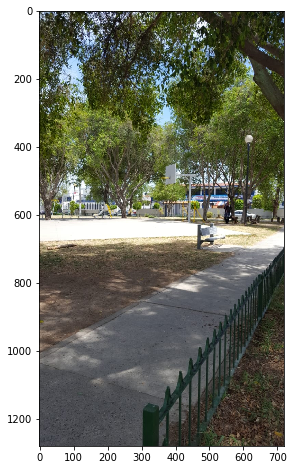

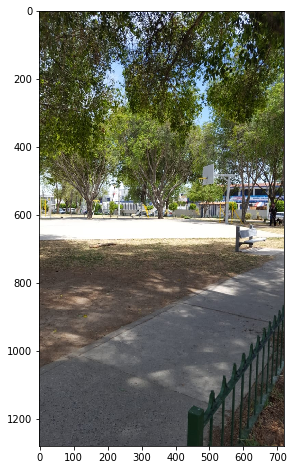

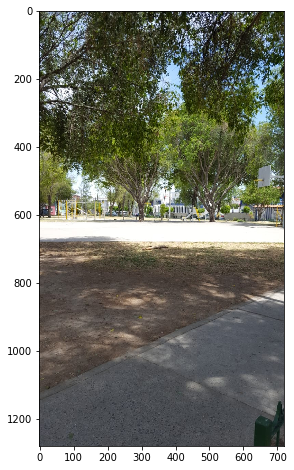

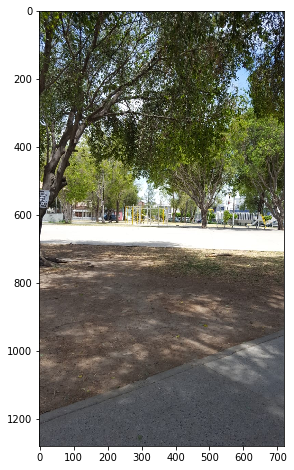

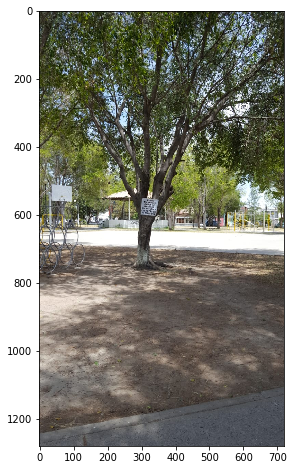

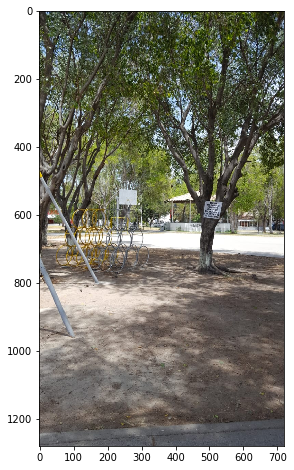

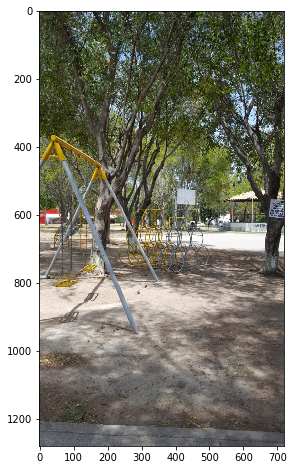

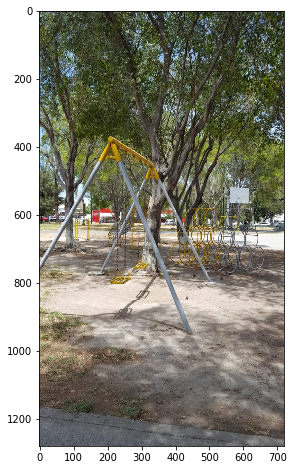

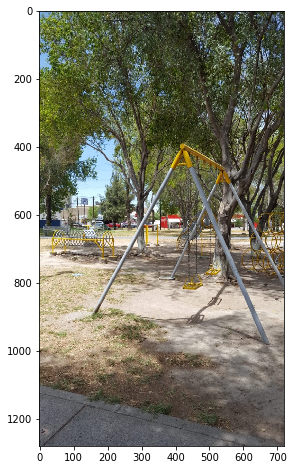

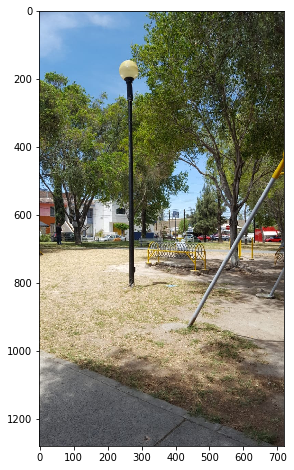

In [3]:
for i in range(1, 11):
    img = cv2.imread("./src/"+str(i)+".jpeg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    plot_img(images[i-1])
    
plt.show()

### Apply RANSAC

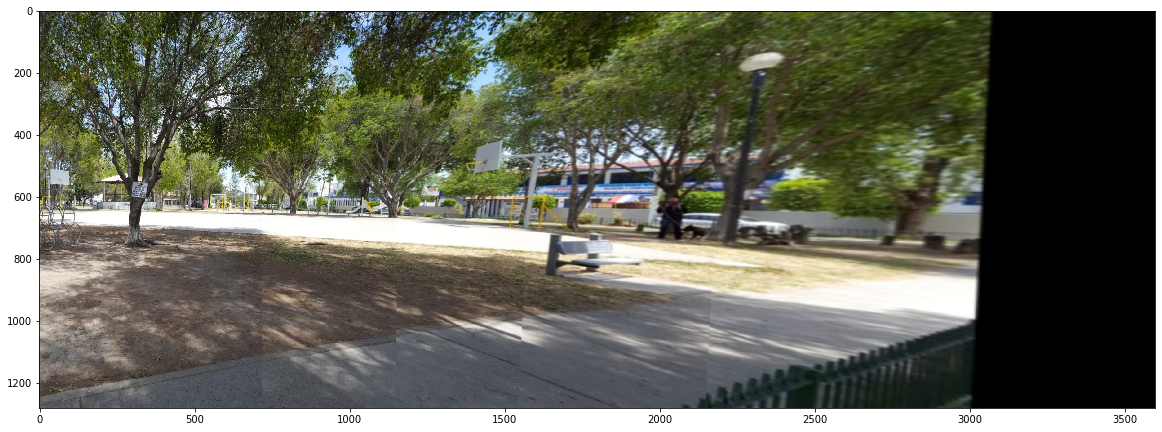

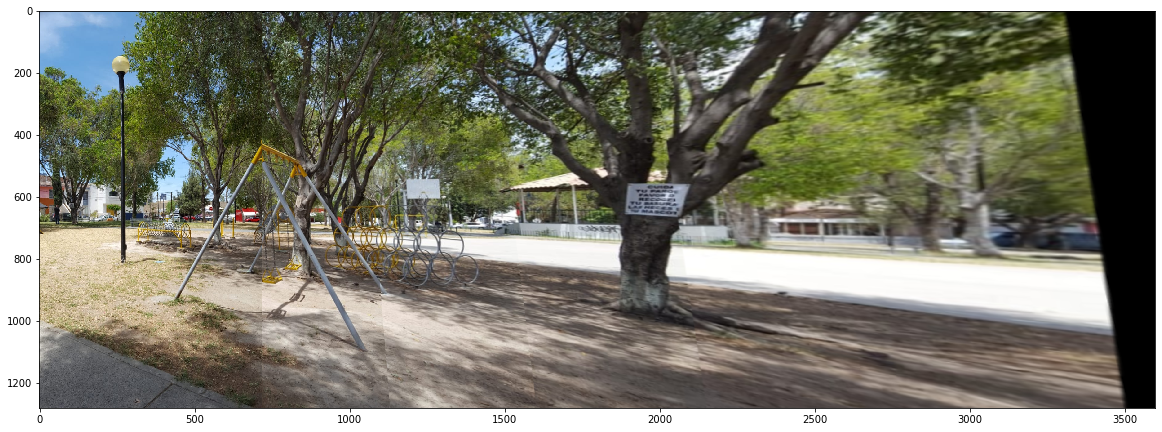

In [7]:
result = stitch(images[0], images[1])
result = stitch(result, images[2])
result = stitch(result, images[3])
result = stitch(result, images[4])

result2 = stitch(images[5], images[6])
result2 = stitch(result2, images[7])
result2 = stitch(result2, images[8])
result2 = stitch(result2, images[9])

plt.figure(figsize = (20,20))
plt.imshow(result)
plt.figure(figsize = (20,20))
plt.imshow(result2)